# Author: Tanay Yadav
# Roll No: AI20BTECH11026
# Assignment 5

## Q1. 
### DBSCAN

In [1]:
# importing the required libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

In [2]:
# reading the datasets

dataset1 = pd.read_csv('dataset1.csv', header=None)
dataset2 = pd.read_csv('dataset2.csv', header=None)

In [3]:
dataset1

,0,1
0,1.489034,-0.372265
1,-0.993560,0.113308
2,1.375386,-0.426868
3,-0.856408,0.516299
4,0.446398,-0.332782
...,...,...
495,0.199975,-0.099966
496,-0.760611,0.649208
497,1.856408,-0.016299
498,-0.169505,0.985529


In [4]:
dataset2

,0,1
0,9.359071,0.337273
1,-1.136104,4.229264
2,-1.818084,4.651985
3,-8.952252,5.983762
4,-6.636040,5.606801
...,...,...
495,99.814052,100.088438
496,106.649856,95.159879
497,95.090079,99.265981
498,101.219465,101.481374


In [5]:
# converting the pandas dataframes to numpy arrays

dataset1 = dataset1.to_numpy()
dataset2 = dataset2.to_numpy()

In [6]:
# function for calculating the distances between 2 points.

def dist(a, b):
      return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

## Implementing DBSCAN Algorithm

In [7]:
def  DBSCAN(dataset, minPts, eps):

      # keeping track of the types of points (core, boundary, noise), visited or not, 
      # neighbouring points of each point, and the cluster assigned to each point.
      # if pointType is 0, the point is a core point
      # if pointType is 1, the point is a boundary point
      # if pointType is 2, the point is a noise point

      # initialising all the points to be of noise type
      pointType = np.array([2]*len(dataset), dtype=int)
      visited = np.array([0]*len(dataset), dtype=int)
      neighbour_points = []
      cluster_assigned = np.array([-1]*len(dataset), dtype=int)

      # making a list of neighbours of each point according to the set parameters.
      for i in range(len(dataset)):
            neighbours = []
            for j in range(len(dataset)):
                  if dist(dataset[i], dataset[j]) <= eps and (i != j):
                        neighbours.append(j)
      
            neighbour_points.append(neighbours)

      # if pointType is 0, the point is a core point
      # if pointType is 1, the point is a boundary point
      # if pointType is 2, the point is a noise point

      # finding the core points
      for i in range(len(dataset)):
            if len(neighbour_points) >= minPts:
                  pointType[i] = 0

      # finding the boundary points
      for i in range(len(dataset)):
            if pointType[i] != 0:
                  for j in range(len(dataset)):
                        if pointType[j] == 0:
                              pointType[i] = 1
      
      cluster = -1
      for i in range(len(dataset)):

            # unvisited core point
            if visited[i] == 0 and pointType[i] == 0:      
                  visited[i] = 1
                  current_cluster = -1
                  
                  for j in neighbour_points[i]:
                        if visited[j] == 1:
                              current_cluster = cluster_assigned[j]
                  
                  # if the current cluster is still -1, we assign a new cluster to the point
                  if current_cluster == -1:
                        cluster += 1
                        current_cluster = cluster

                  for j in neighbour_points[i]:
                        visited[j] = 1
                        cluster_assigned[j] = current_cluster
            
            # visited core point
            elif visited[i] == 1 and pointType[i] == 0:
                  current_cluster = cluster_assigned[i]
                  for j in neighbour_points[i]:
                        visited[j] = 1
                        cluster_assigned[j] = current_cluster

            # visited boundary point
            elif pointType[i] == 1 and visited[i] == 1:
                  current_cluster = cluster_assigned[i]
                  for j in neighbour_points[i]:
                        cluster_assigned[j] = current_cluster
                        visited[j] = 1

            # unvisited noise point
            elif pointType[i] == 2 and visited[i] == 0:
                  visited[i] = 1
                  current_cluster = -1

                  # checking if this point is not in the vicinity of any other visited points.
                  for j in neighbour_points[i]:
                        if visited[j] == 1:
                              current_cluster = cluster_assigned[j]
                  # if the cluster is still unassigned, we assign a new one
                  if current_cluster == -1:
                        cluster+= 1
                        current_cluster = cluster
                  # assigning the current cluster to all the neighbouring points of the current point
                  for j in neighbour_points[i]:
                        cluster_assigned[j] = current_cluster
                        visited[j] = 1
            
            # visited noise point    
            elif pointType[i] == 0 and visited[i] == 1:
                  current_cluster = cluster_assigned[i]
            for j in neighbour_points[i]:
                  cluster_assigned[j] = current_cluster
                  visited[j] = 1

      return cluster_assigned         

[]

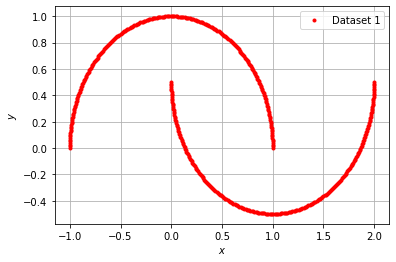

In [8]:
# visualizing the dataset 1
plt.plot(dataset1[:,0], dataset1[:,1], 'r.', label='Dataset 1')
plt.legend(loc='best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.plot()

[]

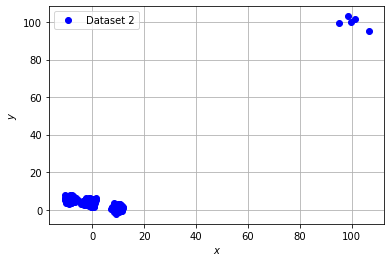

In [9]:
# visualizing the dataset 2

plt.plot(dataset2[:,0], dataset2[:,1], 'bo', label='Dataset 2')
plt.legend(loc='best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.plot()

In [10]:
# implementing k-Means on dataset 1

kmeans_1 = KMeans(n_clusters=2)
kmeans_1.fit(dataset1)

KMeans(n_clusters=2)

In [11]:
# obtaining the labels for each of the points.

labels_1 = kmeans_1.labels_

[]

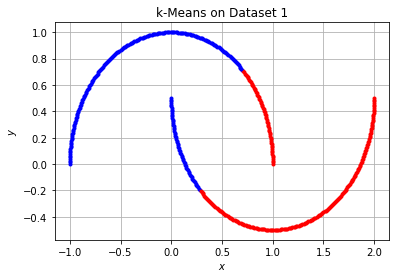

In [12]:
# plotting the output of k-Means on the dataset 1

colors = ['red', 'blue']
for i in range(500):
      plt.plot(dataset1[i,0], dataset1[i,1], '.',  color=colors[labels_1[i]])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.title('k-Means on Dataset 1')
plt.plot()

In [13]:
# implementing k-Means on dataset 2.

kmeans_2 =  KMeans(n_clusters=4)
kmeans_2.fit(dataset2)

KMeans(n_clusters=4)

In [14]:
# obtaining the labels for the dataset 2 from k-Means

labels_2 = kmeans_2.labels_

[]

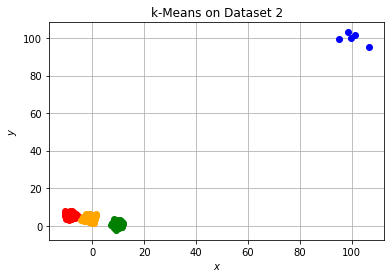

In [31]:
# plotting the output of k-Means for the dataset 2

colors = ['red', 'blue', 'green', 'orange']
for i in range(500):
      plt.plot(dataset2[i,0], dataset2[i,1], 'o',  color=colors[labels_2[i]])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('k-Means on Dataset 2')
plt.grid(True)
plt.plot()

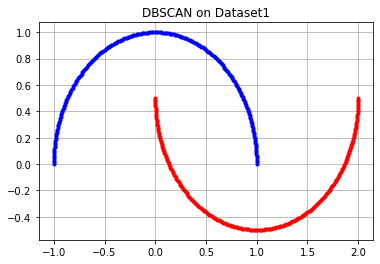

In [16]:
# implementing DBSCAN on dataset 1

DBSCAN_clustering = DBSCAN(dataset1, 7, 0.5)

# creating an array with color for representing different clusters
colors = ['red', 'green', 'blue', 'orange', 'pink', 'yellow']

for i in range(len(dataset1)):
      plt.plot(dataset1[i,0], dataset1[i,1], color=colors[DBSCAN_clustering[i]], marker='.')

plt.grid(True)
plt.title('DBSCAN on Dataset1')
plt.show()

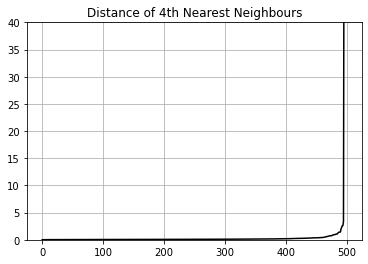

In [17]:
# finding the nearest 4 neighbors
distances = []
for i in range(len(dataset2)):
    dis = np.sum(np.square(dataset2 - dataset2[i]),axis = 1)
    distances.append(np.sort(dis)[4])

# arranging the distances in ascending order
fourth_distance = np.sort(distances)

plt.plot([i for i in range(len(dataset2))],fourth_distance , 'k-')
plt.grid(True)
plt.ylim(0,40)
plt.title("Distance of 4th Nearest Neighbours")
plt.show()

Here we can see that the knee is between 0 and 5 along the y axis and 400 and 500 along the x axis.
We modify the plot slightly

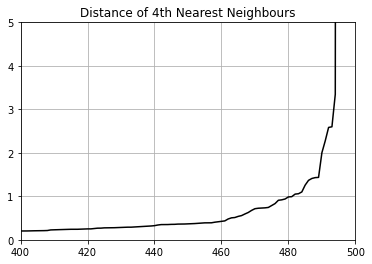

In [18]:
plt.plot([i for i in range(len(dataset2))],fourth_distance , 'k-')
plt.grid(True)
plt.title("Distance of 4th Nearest Neighbours")
plt.xlim(400,500)
plt.ylim(0,5)
plt.show()

From here we can see that the knee of this graph is at y=2

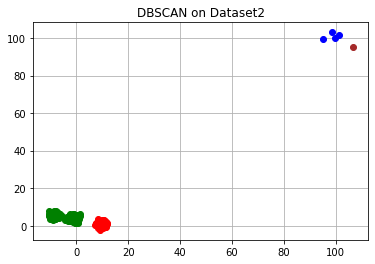

In [19]:
# implementing the DBSCAN algorithm on dataset 2 with the optimised hyperparameters.

DBSCAN_clustering = DBSCAN(dataset2, 2, 5)
colors = ['red', 'green', 'blue', 'orange', 'pink', 'yellow', 'purple', 'cyan', 'brown']

for i in range(len(dataset2)):
      plt.plot(dataset2[i,0], dataset2[i,1], color=colors[DBSCAN_clustering[i]], marker='o')

plt.grid(True)
plt.title('DBSCAN on Dataset2')
plt.show()

$Observations:$
1. The output of k-Means is not useful for the 1st database as it misclassifies the dataset. The DBSCAN algorithm does the correct job at separting both the spirals and is the better algorithm for this type of clustering. The k-Means algorithm assumes a centroid which best creates 2 regions and clusters the points accordingly. But no such centroid can be found that correctly separates dataset 1. DBSCAN uses the epsilon-delta neighbourhood of all the points and their densities and assignes clusters to the dense regions appropriately. 
2. The output of k-Means for the 2nd dataset is decent but lacks the details and separation of noisy points which DBSCAN accounts for. DBSCAN has provided with detailed separation among clusters and noisy points.
3. Pros of k-Means: This is easier to implement, easier to use on large databases, and is bound to converge.
4. Cons of k-Means: This highly sensitive to the number of clusters and dimensions. Noisy data with a considerable amount of outliers reduce the accuracy of this algorithm.
5. Pros of DBSCAN: The number of clusters are found according to the parameters set and the density of the dataset, it doesn't have to be provided by the user. It handles outliers and noisy points really well. 
6. Cons of DBSCAN: It is highly sensitive to the parameters and the parameters require fine tuning to get an accurate result. It also has reduced accuracy over large datasets.

# Q2
## t-SNE

In [20]:
# importing the dataset

dataset = load_digits()

# checking all the parameters in the dataset.
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [32]:
dataset.data.shape

(1797, 64)

## Perplexity 30 and number of iterations 1000

In [42]:
reduced_1000 = TSNE(n_components = 2 , n_iter = 1000).fit_transform(dataset.data)

In [43]:
reduced_1000.shape

(1797, 2)

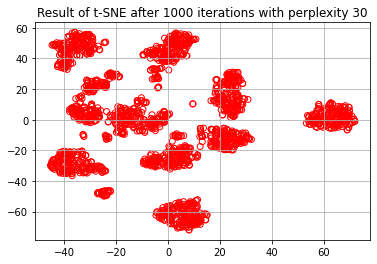

In [44]:
plt.scatter(reduced_1000[:,0], reduced_1000[:,1], marker='o', ec='r', fc='None')
plt.grid(True)
plt.title('Result of t-SNE after 1000 iterations with perplexity 30')
plt.show()

## Perplexity 30 and number of iterations 250

In [45]:
reduced_250 = TSNE(n_components = 2 , n_iter = 250).fit_transform(dataset.data)

In [46]:
reduced_250.shape

(1797, 2)

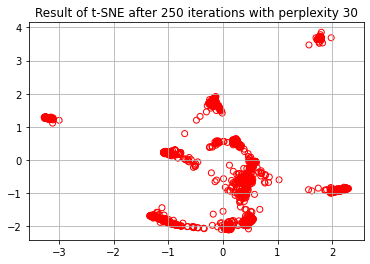

In [47]:
plt.scatter(reduced_250[:,0], reduced_250[:,1], marker='o', ec='r', fc='None')
plt.grid(True)
plt.title('Result of t-SNE after 250 iterations with perplexity 30')
plt.show()

## Perplexity 30 and Number of Iterations 2000

In [48]:
reduced_2000 = TSNE(n_components = 2 , n_iter = 2000).fit_transform(dataset.data)

In [49]:
reduced_2000.shape

(1797, 2)

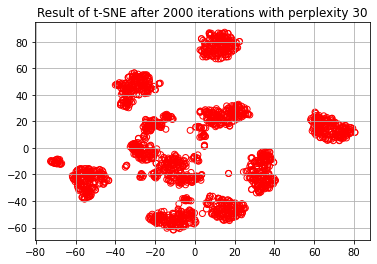

In [50]:
plt.scatter(reduced_2000[:,0], reduced_2000[:,1], marker='o', ec='r', fc='None')
plt.grid(True)
plt.title('Result of t-SNE after 2000 iterations with perplexity 30')
plt.show()

$Observations:$
1. As the number of iterations increase, the plot spreads over a larger region while forming better clusters. 
2. In the graph with 250 iterations, the points are poorly clustered and are overlapping. While as we move to 1000 iterations, the clusters are smaller and well defined, and points are disctinct. This improves with 2000 iterations, however, the returns are diminishing with increasing iterations now on. Hence, the algorithm reaches convergence.

# (b)
t-SNE has a non-convex cost function. Hence, different initialisations result in attaining of different local maximas or saddle points or a region having a non-zero gradient but is flat. This results in no guarantee of attaining the global maxima. Hence, different runs of t-SNE with same hyperparameters produce different results.